<a href="https://colab.research.google.com/github/johnkansas/dacon_start_tutorial_test/blob/main/Lv3_1_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-01-12 00:25:03--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-01-12 00:25:03--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 142.250.128.102, 142.250.128.100, 142.250.128.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.128.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6it6ub7ugr2jgl4ndofpt6m47ajt0snh/1641947100000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2022-01-12 00:25:04--  https://doc-10-10-docs.googleusercontent.com/docs/secur

In [ ]:
# 라이브러리 불러오기

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# 데이터를 불러와 학습시킬 준비하기
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [ ]:
# 시각화를 진행할 때는 보통 copy() 매서드로 복사본을 생성한 후 진행합니다.
# -------------------------------------------------------------------------------
traincopy = train.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51656 missing from current font.
  

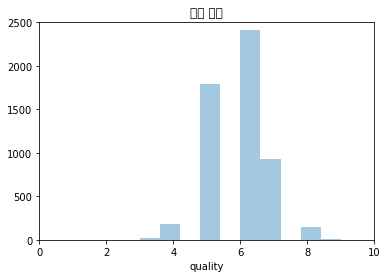

In [ ]:
# 타깃 변수(와인 품질) 분포 시각화
sns.distplot(traincopy['quality'], kde=False, bins=10)
plt.axis([0, 10, 0, 2500]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.title("와인 품질") # 그래프 제목 지정
plt.show() # 그래프 그리기

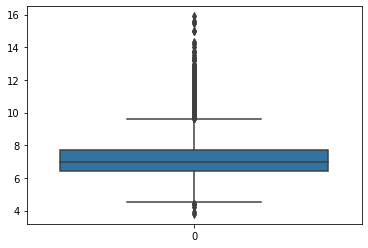

In [ ]:
#IQR로 이상치 확인 지금 현재 위쪽으로 이상치(Outlier)가 많은 모습을 볼수 있다.
sns.boxplot(data=train['fixed acidity'])

In [ ]:
# "fixed acidity"가 25%인 값을 "quantile_25" 라는 변수에 만들어 주세요
quantile_25 = np.quantile(train['fixed acidity'], 0.25)
# "fixed acidity"가 75%인 값을 "quantile_75" 라는 변수에 만들어 주세요
quantile_75 = np.quantile(train['fixed acidity'],0.75)
# quantile_75와 quantile_25의 차이를 "IQR"이라는 변수에 만들어 주세요
IQR = quantile_75 - quantile_25
# quantile_25보다 1.5 * IQR 작은 값을 "minimum"이라는 변수에 만들어 주세요
minimum = quantile_25 - 1.5 * IQR
# quantile_75보다 1.5 * IQR 큰 값을 "maximum"이라는 변수에 만들어 주세요
maximum = quantile_75 + 1.5 * IQR
'''
원래 이상치 제거할때 1.5배 해서 위 아래로 제거해줌
'''
# "fixed acidity"가 minimum보다 크고, maximum보다 작은 값들만 "train2"에 저장해 주세요
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]
# train2.shape를 통해서, 총 몇개의 행이 되었는지 확인해보세요.
print(train2.shape)
# 몇개의 이상치가 있는지도 계산해보세요.
# 294개의 이상치를 발견해 제거했습니다.
train.shape[0] - train2.shape[0]

(5203, 14)


294

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


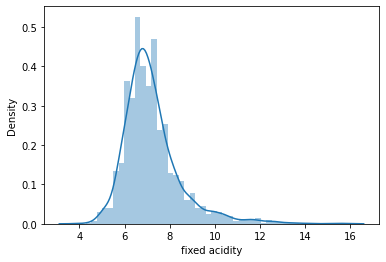

In [ ]:
#scaler는 데이터 값의 범위가 데이터 종류마다 달라 다르게 영향을 준다. 그것을 방지하기 위해서
sns.distplot(train['fixed acidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


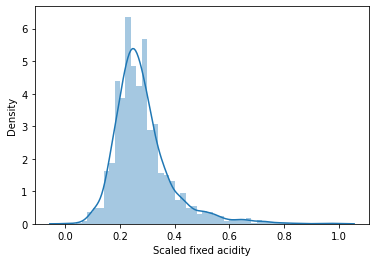

In [ ]:
# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])
sns.distplot(train['Scaled fixed acidity'])

In [17]:
# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()#인코더 넣은 후 변환해주는 모습
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()# 열이름 추가 가능
train = pd.concat([train, onehot], axis = 1)# 원래 type에 red white가 같이 있었는데 onehot으로 0,1로 표시해서 열단위로 분리하였다.
#그다음 원본 데이터랑 합친 모습
train = train.drop(columns = ['type'])# 그리고 원래 있었던 type 열은 필요가 없음 교체한거죠

onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
test = pd.concat([test, onehot], axis = 1)
test = test.drop(columns = ['type'])

test.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0.429752,0.0,1.0
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0.785124,1.0,0.0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0.223140,0.0,1.0
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0.280992,0.0,1.0
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0.247934,0.0,1.0


In [21]:
# sklearn에 model_selection 부분 속 KFold를 불러와보세요
from sklearn.model_selection import KFold
# "X"라는 변수에 train의 "index"와 "quality"를 제외하고 지정해 주세요
# "y"라는 변수에는 "quality"를 지정해 주세요

X = train.drop(columns = ['index','quality'])
y = train['quality']

# "kf"라는 변수에 KFold를 지정해 줍시다.
# n_splits는 5, shuffle은 True, random_state는 0으로 설정해주세요

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

# "model"이라는 변수에 RandomForestClassifier를 지정해 줍시다.
# valid_scores라는 빈 리스트를 하나 만들어줍시다.
# test_predictions라는 빈 리스트를 하나 만들어 줍시다.

model = RandomForestClassifier(random_state = 0)
valid_scores = []
test_predictions = []

# 지난 시간에 다루었던 kf.split()을 활용해, 반복문으로 X_tr, y_tr, X_val, y_val을 설정해봅시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  # 앞의 문제에 이어서 반복문 속에서 model.fit(X_tr, y_tr)을 활용해 모델을 학습해봅시다

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)

# 앞의 문제에 이어서 반복문 속에서 "valid_prediction"이라는 변수에 model.predict(X_val)의 결과를 저장해 봅시다. 

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)
  
  valid_prediction = model.predict(X_val)

In [22]:
# 앞의 문제에 이어서 반복문 속에서 accuracy_score를 이용해, 모델이 어느정도의 예측 성능이 나올지 확인해봅시다.
# 그리고 "valid_prediction"의 점수를 scores에 저장 해봅시다. 
# 반복문에서 빠져나온 후에 np.mean()을 활용해 평균 점수를 예측해봅시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)
  
  valid_prediction = model.predict(X_val)
  score = accuracy_score(y_val, valid_prediction)
  valid_scores.append(score)
  print(score)
print('평균 점수 : ', np.mean(valid_scores))

# 이제 어느정도의 성능이 나올지 알게 되었으니, 반복문 속에서 test를 예측해 "test_prediction"이라는 변수에 지정해봅시다.
# test_prediction을 지정했다면, "test_precitions"라는 빈 리스트에 넣어줍시다.

for train_idx, valid_idx in kf.split(X,y) : 
  X_tr = X.iloc[train_idx]
  y_tr = y.iloc[train_idx]

  X_val = X.iloc[valid_idx]
  y_val = y.iloc[valid_idx]

  model.fit(X_tr, y_tr)

  test_prediction = model.predict(test.drop(columns = ['index']))
  test_predictions.append(test_prediction)

# 이제 결과 값을 만들어 보겠습니다.
# "test_precitions"를 Data Frame으로 만들어주세요

test_predictions = pd.DataFrame(test_predictions)
test_predictions

# DF.mode()를 활용해 열별 최빈값을 확인하고, "test_prediction"이라는 변수에 지정해봅시다.
# "test_prediction"의 첫 행을 최종 결과값으로 사용합시다.

test_prediction = test_predictions.mode()
test_prediction = test_predictions.values[0]
test_prediction

# data의 sample_submission 파일을 불러와 "quality"라는 변수에 "test_precition"을 저장해줍시다.
# 그 이후에는, "data/submission_KFOLD.csv"에 저장하고, 제출해봅시다.

sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['quality'] = test_prediction
sample_submission.to_csv('data/submission_KFOLD.csv', index=False)

0.69
0.6663636363636364
0.6569608735213831
0.6760691537761602
0.6715195632393085
평균 점수 :  0.6721826453800976


In [18]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=4f0c6d3cf536bb42fe54d929e5da30adb5d2945088224497092cf216d1dbc7a7
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [23]:
# Bayesian Optimization 불러오기
from bayes_opt import BayesianOptimization

In [24]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요
X = train.drop(columns = ['index', 'quality'])
y = train['quality']

In [25]:
# 랜덤포레스트의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요
## Key는 랜덤포레스트의 hyperparameter이름이고, value는 탐색할 범위 입니다.
rf_parameter_bounds = {
                      'max_depth' : (1,3), # 나무의 깊이
                      'n_estimators' : (30,100),
                      }

In [26]:
# 함수를 만들어주겠습니다.
# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환

def rf_bo(max_depth, n_estimators):
  rf_params = {
              'max_depth' : int(round(max_depth)),
               'n_estimators' : int(round(n_estimators)),      
              }
  rf = RandomForestClassifier(**rf_params)

  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )

  rf.fit(X_train,y_train)
  score = accuracy_score(y_valid, rf.predict(X_valid))
  return score

In [27]:
# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.
# "BO_rf"라는 변수에 Bayesian Optmization을 저장해보세요
BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds,random_state = 0)

In [28]:
# Bayesian Optimization을 실행해보세요
BO_rf.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.52     |  2.098    |  80.06    |
|  2        |  0.5155   |  2.206    |  68.14    |
|  3        |  0.4836   |  1.847    |  75.21    |
|  4        |  0.5409   |  1.875    |  92.42    |
|  5        |  0.5309   |  2.927    |  56.84    |
|  6        |  0.4482   |  1.018    |  48.01    |
|  7        |  0.5355   |  2.07     |  80.1     |
|  8        |  0.5336   |  2.663    |  74.79    |
|  9        |  0.5227   |  2.073    |  80.27    |
|  10       |  0.5345   |  2.079    |  80.27    |


In [29]:
# 하이퍼파라미터의 결과값을 불러와 "max_params"라는 변수에 저장해보세요
max_params = BO_rf.max['params']

max_params['max_depth'] = int(max_params['max_depth'])
max_params['n_estimators'] = int(max_params['n_estimators'])
print(max_params)

{'max_depth': 1, 'n_estimators': 92}


In [30]:
# Bayesian Optimization의 결과를 "BO_tuend_rf"라는 변수에 저장해보세요
BO_tuend_rf = RandomForestClassifier(**max_params)